## Evaluation on Testset

---

### ([Pour zoomer dans l'image de Synthèse](img/Synthèse.png))

![alt text](img\Synthèse.png)


Notre évaluation se basera sur les métriques de classification suivantes :
- **Accuracy** : Insuffisante dans notre cas en raison du déséquilibre du jeu de données.
- **Précision** : Permet d'évaluer la performance sur un jeu de données non équilibré.
- **Rappel** : Indispensable pour mesurer la capacité à identifier correctement les classes minoritaires.
- **F1-score** : Offre une mesure équilibrée entre précision et rappel pour les jeux de données déséquilibrés.

Nous allons aussi voir ces métriques par catégorie afin de vérifier si les classes minoritaires sont aussi bien classifiéés

### Evaluation sur le modèle "best_model_10_epoch.keras" entrainé avec : 

- Pre_trained Model: InceptionResnetV2
- Epoch: 10
- loss_function: categorical_crossentropy 
- Optimiser: Adam
- learningRate: 1e-4 
- Compute class weights to handle class imbalance
- Headmodel avec L2 regularisation and dropout
- Couche de sortie avec une focntion d'activation Softmax
et 100 sortie des classes
- BatchSize:  16 

### Importation du modèle

In [5]:
from tensorflow.keras.models import load_model
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the Saved Model 
model = load_model(r'models\best_model_10_epoch.keras')

### Calcul des métriques

In [6]:

#Load the Test Dataset ---
df_test = pd.read_csv(r'data\clean_testset.csv')

# create Test Data Generator ---
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory='all_images/',           # Directory containing the images
    x_col='image_id',                  # Column containing image filenames
    y_col='category_id',               # Column containing class labels
    target_size=(160, 160),            
    batch_size=32,                     
    class_mode='categorical',          # Multi-class classification
    shuffle=False                      # No shuffling for evaluation
)

# Predict the classes for the test set
predictions = model.predict(test_generator)
# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Extract the true labels from the generator
true_classes = test_generator.classes


accuracy = accuracy_score(true_classes, predicted_classes)

precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Found 4205 validated image filenames belonging to 100 classes.


c:\Users\tariq\Desktop\Mirakl project\test_technique_cv\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 427s 3s/step
Test Accuracy: 36.39%
Precision: 0.3150
Recall: 0.3105
F1 Score: 0.2855


c:\Users\tariq\Desktop\Mirakl project\test_technique_cv\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Calcul des métriques par catégorie

In [7]:
# Confusion Matrix ---
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Classification Report ---
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(class_report)

Found 4205 validated image filenames belonging to 100 classes.


c:\Users\tariq\Desktop\Mirakl project\test_technique_cv\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 374s 3s/step
              precision    recall  f1-score   support

    010870b0       0.24      0.30      0.26        64
    0184e8c2       0.35      0.73      0.48        60
    01863d03       0.33      0.67      0.44        46
    023df7ee       0.02      0.12      0.03         8
    031ca19d       0.34      0.52      0.41        44
    03d97d9c       0.52      0.53      0.53        47
    0502f6d6       0.06      0.06      0.06        17
    068c35b0       0.00      0.00      0.00        39
    15e4fb4b       0.08      0.03      0.05        30
    1775f878       0.37      0.42      0.39        66
    18f8d9f2       0.17      0.05      0.07        22
    1e350c72       0.42      0.41      0.42        73
    1e5a068c       0.21      0.69      0.33        48
    231d4ba0       0.44      0.56      0.49        48
    235a9267       0.00      0.00      0.00        43
    2be54121       0.35      0.14      0.20        51
    2e3f4a3a       0.72      0.70      

c:\Users\tariq\Desktop\Mirakl project\test_technique_cv\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tariq\Desktop\Mirakl project\test_technique_cv\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tariq\Desktop\Mirakl project\test_technique_cv\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [12]:
print(conf_matrix)

[[19  0 11 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 31 ...  0  1  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 1  0  8 ...  0  0 10]]


### Revoir notre distribution de train et test pour l'analyse

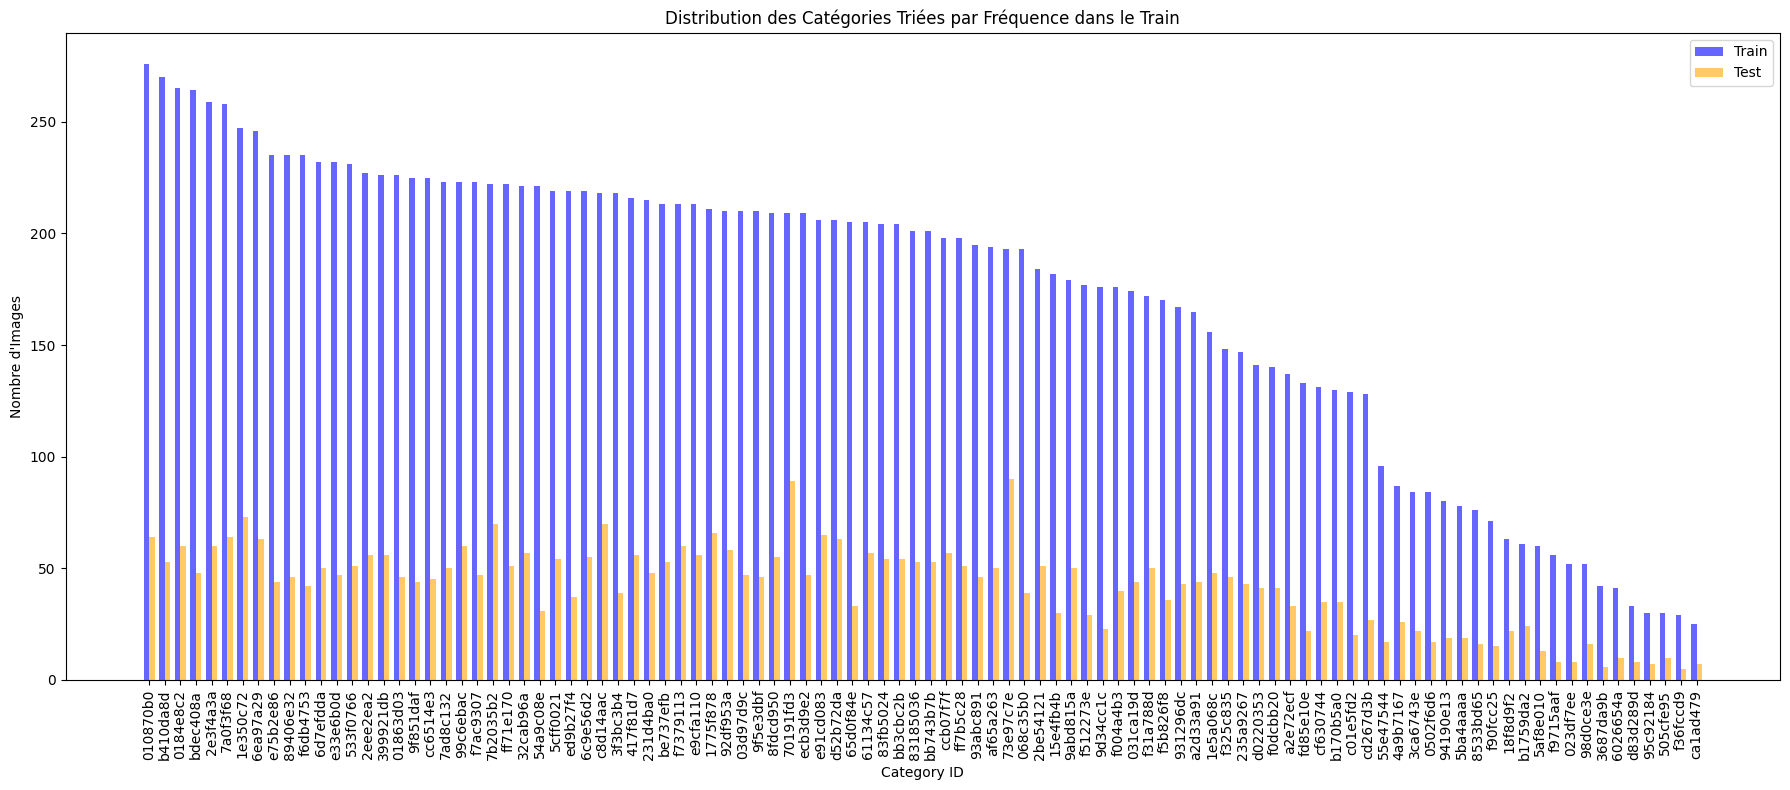

Nombre de produits pour la catégorie 399921db - Train: 226, Test: 56


In [11]:
import matplotlib.pyplot as plt
import pandas as pd

df_test = pd.read_csv(r'data\clean_testset.csv')
df_train = pd.read_csv(r'data\clean_trainset.csv')

category_distribution_test = df_test['category_id'].value_counts()
category_distribution_train = df_train['category_id'].value_counts()
categories = sorted(set(category_distribution_test.index).union(set(category_distribution_train.index)))

category_distribution_test = category_distribution_test.reindex(categories, fill_value=0)
category_distribution_train = category_distribution_train.reindex(categories, fill_value=0)

sorted_categories = category_distribution_train.sort_values(ascending=False).index
category_distribution_train = category_distribution_train[sorted_categories]
category_distribution_test = category_distribution_test[sorted_categories]

plt.figure(figsize=(18, 8))

width = 0.35 
x = range(len(sorted_categories))
plt.bar(x, category_distribution_train, width=width, label='Train', color='blue', alpha=0.6)
plt.bar([p + width for p in x], category_distribution_test, width=width, label='Test', color='orange', alpha=0.6)
plt.title('Distribution des Catégories Triées par Fréquence dans le Train')
plt.xlabel('Category ID')
plt.ylabel('Nombre d\'Images')
plt.xticks([p + width / 2 for p in x], sorted_categories, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

def get_number_of_products_by_category(category_id):
    count_train = df_train[df_train['category_id'] == category_id].shape[0]
    count_test = df_test[df_test['category_id'] == category_id].shape[0]
    return count_train, count_test

category_id_to_search = '399921db'  
number_of_products_train, number_of_products_test = get_number_of_products_by_category(category_id_to_search)
print(f"Nombre de produits pour la catégorie {category_id_to_search} - Train: {number_of_products_train}, Test: {number_of_products_test}")


### Analyse des Résultats

- Précision (Accuracy): 36.39%. Cela signifie que le modèle a correctement classé environ 36% des images de test. C'est faible, surtout pour un modèle complexe comme InceptionResNetV2.
- Précision Moyenne (Precision): 0.315. La précision indique que parmi les images classées dans une catégorie, seulement 31.5% sont correctes en moyenne. Cela suggère un nombre élevé de faux positifs.
- Rappel Moyen (Recall): 0.3105. Le rappel indique que le modèle a correctement identifié environ 31% des images appartenant à chaque catégorie, en moyenne. Cela suggère un nombre élevé de faux négatifs.
- F1-Score Moyen: 0.2855. Le score F1 combine la précision et le rappel en une seule métrique, ce qui confirme que le modèle n'a pas bien appris à distinguer les différentes classes.



Certaines catégories ont une bonne précision et un bon rappel, par exemple :
- 0184e8c2: Précision 0.35, Rappel 0.73.
- 399921db: Précision 0.69, Rappel 0.79.

Cependant, de nombreuses catégories ont des scores très faibles, voire nuls, pour la précision, le rappel et le score F1, comme :
- 068c35b0: Précision 0.00, Rappel 0.00.
- f90fcc25: Précision 0.00, Rappel 0.00.

--> ces scores nuls indiquent que le modèle n'a pas été capable de prédire ces catégories du tout, ce qui est souvent un signe du problème déséquilibre de classe.


## Evaluation sur le meme modèle mais entrainée avec 10 epoch suplémentaires et lr 1e-5

Evaluation du modèle ``best_model_continued_20_epoch.keras``

In [14]:
from tensorflow.keras.models import load_model
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np



model = load_model(r'best_model_continued.keras')
df_test = pd.read_csv(r'data\clean_testset.csv')
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory='all_images/',           # Directory containing the images
    x_col='image_id',                  # Column containing image filenames
    y_col='category_id',               # Column containing class labels
    target_size=(160, 160),            
    batch_size=32,                     
    class_mode='categorical',          
    shuffle=False                      # No shuffling for evaluation
)

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
# Extract the true labels from the generator
true_classes = test_generator.classes

accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Found 4205 validated image filenames belonging to 100 classes.


c:\Users\tariq\Desktop\Mirakl project\test_technique_cv\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step
Test Accuracy: 43.31%
Precision: 0.3668
Recall: 0.3792
F1 Score: 0.3477


c:\Users\tariq\Desktop\Mirakl project\test_technique_cv\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Nous remarquons que les quatres métriques se sont améliorées significativement en ajoutant un fit avec 10 epoch au modèle. Cependant, ces métriques suggèrent qu'il y a encore de la marge pour l'amélioration.


## Améliorations et perspectives

---

- Entrainer le modèle sur 50 epochs avec
 schedual pour le Learning Rate
- Changer les paramètres de régularisation
 pour stabiliser l'entrainement
- Ajouter de la cross validation pour éviter l'overfitting
- Ajouter d'autres techniques pour gérer 
le déséquilibre entre les classes
- Utiliser d'autres modèles pré-entrainée
 comme EfficientNet ou VIT
- Utiliser des techniques d'ensembles
 (bagging, boosting, stacking)
- Si on avait du texte avec les images, on pourait utiliser des modèles multi-modale pour améliorer la classification
